In [ ]:
# Make DataFrame
trainUrl = '/content/drive/MyDrive/AIProject/train/'
valUrl = '/content/drive/MyDrive/AIProject/val/'

dft1 = pd.read_csv( trainUrl + 'in_training.csv' )
dft2 = pd.read_csv( trainUrl + 'noise_training.csv' )
dft3 = pd.read_csv( trainUrl + 'other_training.csv' )
dft4 = pd.read_csv( trainUrl + 'out_training.csv' )
dft5 = pd.read_csv( trainUrl + 'normal_training.csv' )

dfv1 = pd.read_csv( valUrl + 'in_validation.csv' )
dfv2 = pd.read_csv( valUrl + 'noise_validation.csv' )
dfv3 = pd.read_csv( valUrl + 'other_validation.csv' )
dfv4 = pd.read_csv( valUrl + 'out_validation.csv' )
dfv5 = pd.read_csv( valUrl + 'normal_validation.csv' )

test = dft1.copy()
test = test.append(dft2)
test = test.append(dft3)
test = test.append(dft4)
test = test.append(dft5)

val = dfv1.copy()
val = val.append(dfv2)
val = val.append(dfv3)
val = val.append(dfv4)
val = val.append(dfv5)

In [ ]:
test.head()

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-4677025029,S-0359369083949186,20200127,90,231,in,0,5,5,5,...,440.0,311.0,440.0,233.0,430.0,172.0,430.0,335.0,440.0,197.0
1,S-4673025027,S-0359369085139216,20210109,90,394,in,0,3,3,4,...,240.0,273.0,240.0,225.0,240.0,462.0,240.0,548.0,240.0,525.0
2,S-4784025026,S-0359369085176895,20201216,90,431,in,0,11,15,16,...,260.0,545.0,270.0,355.0,270.0,313.0,260.0,492.0,260.0,415.0
3,S-4677025033,S-0359369083951596,20191113,90,190,in,0,11,11,11,...,430.0,163.0,430.0,223.0,430.0,206.0,2900.0,163.0,2820.0,149.0
4,S-2911010106,S-0359369084033170,20210108,90,516,in,0,4,4,4,...,400.0,565.0,400.0,453.0,390.0,462.0,400.0,604.0,390.0,578.0


In [ ]:
# site : 사이트 번호
# sid : 센서번호
# ldate : 누수이벤트 감지 일자
# Irate : 누수 감지 확률
# Ilevel :  10번의 누수감지를 체크하고 일정 기준치 이상 반응한 크기의 평균값
# leaktype : 누수감지 여부 ( 정상 : 기계.전기음, 환경음, 정상음)
      # 옥외누수 - out 
      # 옥내누수 - in 
      # 기계.전기음 - noise
      # 환경음 - other  
      # 정상음 - normal
# (X)HZ :  주파수 진동 크기
# MAX(X) : X번째까지의 Ilevel 최대치

In [ ]:
#필요 컬럼 : 
      # index : sid 
      # X : , (X)HZ
      # y : leaktype
#제거 컬럼 : 
      # 보조 데이터 : site, ldate
      # 결과값 관련 : Irate, Ilevel, leaktype, MAX(X)
hzCols = [col for col in test.columns if 'HZ' in col]
maxCols = [col for col in test.columns if 'MAX' in col]
cols = ['leaktype']
cols += hzCols
cols += maxCols

def makeMean(maxCols,value):
  val = test[maxCols][test['leaktype'] == value].mean()
  return val

def printPlt(x,y,data,title, xSize, ySize) :
  ax[x,y].plot(data)
  x_tick_positions = np.linspace(0, xSize, 6)
  y_tick_positions = np.linspace(0, ySize, 6)
  ax[x,y].set_xticks(x_tick_positions)
  ax[x,y].set_yticks(y_tick_positions)
  ax[x,y].set_title(title)
  return 0


def printPlt2(x,data,title, xSize, ySize) :
  ax[x].plot(data)
  x_tick_positions = np.linspace(0, xSize, 6)
  y_tick_positions = np.linspace(0, ySize, 6)
  ax[x].set_xticks(x_tick_positions)
  ax[x].set_yticks(y_tick_positions)
  ax[x].set_title(title)
  return 0


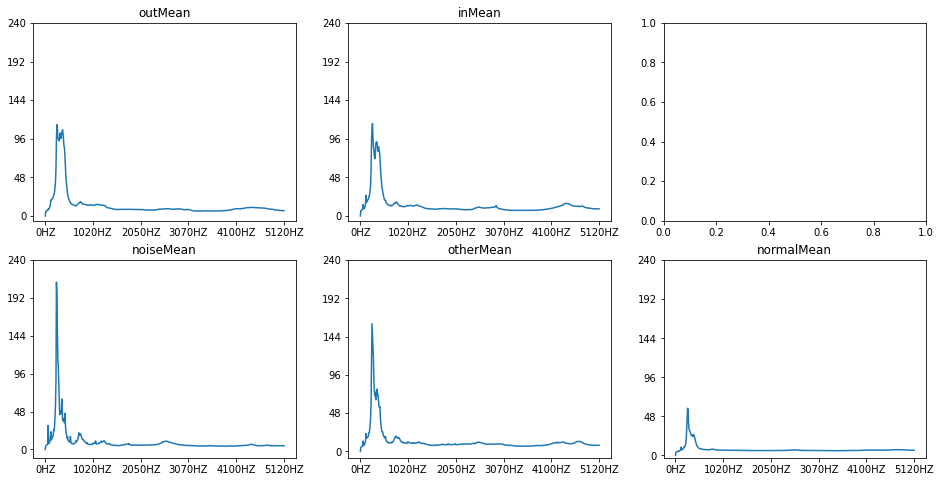

In [ ]:
outMean = makeMean(hzCols,'out')
inMean = makeMean(hzCols,'in')
noiseMean = makeMean(hzCols,'noise')
otherMean = makeMean(hzCols,'other')
normalMean = makeMean(hzCols,'normal')

xSize = len(outMean) - 1 
ySize = 240

fig, ax = plt.subplots(2, 3, figsize=(16, 8))


printPlt(0,0,outMean,'outMean',xSize, ySize)
printPlt(0,1,inMean,'inMean',xSize, ySize)
printPlt(1,0,noiseMean,'noiseMean',xSize, ySize)
printPlt(1,1,otherMean,'otherMean',xSize, ySize)
printPlt(1,2,normalMean,'normalMean',xSize, ySize)

plt.show()

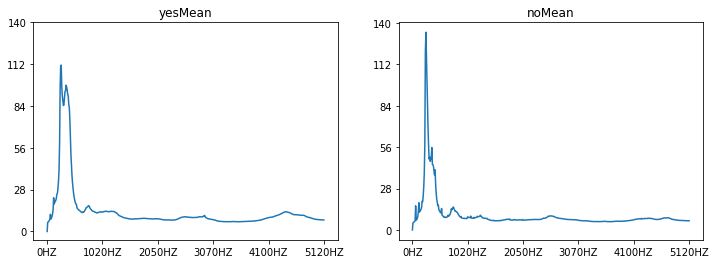

In [ ]:
#누수 O hz 평균 그래프
yesMean = (outMean + inMean) / 2
noMean = (noiseMean + otherMean + normalMean) / 3

fig, ax = plt.subplots(1,2, figsize=(12, 4))
xSize = len(yesMean) - 1 
ySize2 = 140

printPlt2(0,yesMean,'yesMean',xSize, ySize2)
printPlt2(1,noMean,'noMean',xSize, ySize2)

plt.show()

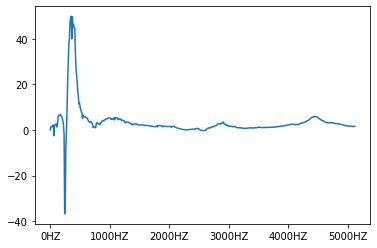

In [ ]:
gapMean = yesMean - noMean
gapMean.plot()

In [ ]:
maxCols0 = [maxCols[i] for i in range(len(maxCols)) if i % 2 == 0]

outMean2 = makeMean(maxCols0,'out')
inMean2 = makeMean(maxCols0,'in')
noiseMean2 = makeMean(maxCols0,'noise')
otherMean2 = makeMean(maxCols0,'other')
normalMean2 = makeMean(maxCols0,'normal')

xSize = len(outMean2) - 1 
ySize = 700

fig, ax = plt.subplots(2, 3, figsize=(16, 8))

printPlt(0,0,outMean2,'outMean2',xSize, ySize)
printPlt(0,1,inMean2,'inMean2',xSize, ySize)
printPlt(1,0,noiseMean2,'noiseMean2',xSize, ySize)
printPlt(1,1,otherMean2,'otherMean2',xSize, ySize)
printPlt(0,2,normalMean2,'normalMean2',xSize, ySize)

plt.show()

In [ ]:
maxCols1 = [maxCols[i] for i in range(len(maxCols)) if i % 2 == 1]


outMean2 = makeMean(maxCols1,'out')
inMean2 = makeMean(maxCols1,'in')
noiseMean2 = makeMean(maxCols1,'noise')
otherMean2 = makeMean(maxCols1,'other')
normalMean2 = makeMean(maxCols1,'normal')

xSize = len(outMean2) - 1 
ySize = 700

fig, ax = plt.subplots(2, 3, figsize=(16, 8))

printPlt(0,0,outMean2,'outMean2',xSize, ySize)
printPlt(0,1,inMean2,'inMean2',xSize, ySize)
printPlt(1,0,noiseMean2,'noiseMean2',xSize, ySize)
printPlt(1,1,otherMean2,'otherMean2',xSize, ySize)
printPlt(0,2,normalMean2,'normalMean2',xSize, ySize)

plt.show()

In [ ]:
#필요 컬럼 : 
      # index : sid 
      # X : , (X)HZ
      # y : leaktype

# Make DataFrame
trainUrl = '/content/drive/MyDrive/AIProject/train/'
valUrl = '/content/drive/MyDrive/AIProject/val/'

dft1 = pd.read_csv( trainUrl + 'in_training.csv' )
dft2 = pd.read_csv( trainUrl + 'noise_training.csv' )
dft3 = pd.read_csv( trainUrl + 'other_training.csv' )
dft4 = pd.read_csv( trainUrl + 'out_training.csv' )
dft5 = pd.read_csv( trainUrl + 'normal_training.csv' )

dfv1 = pd.read_csv( valUrl + 'in_validation.csv' )
dfv2 = pd.read_csv( valUrl + 'noise_validation.csv' )
dfv3 = pd.read_csv( valUrl + 'other_validation.csv' )
dfv4 = pd.read_csv( valUrl + 'out_validation.csv' )
dfv5 = pd.read_csv( valUrl + 'normal_validation.csv' )

df_t = dft1.copy()
df_t = df_t.append(dft2)
df_t = df_t.append(dft3)
df_t = df_t.append(dft4)
df_t = df_t.append(dft5)
df_t = df_t.reset_index()

df_v = dfv1.copy()
df_v = df_v.append(dfv2)
df_v = df_v.append(dfv3)
df_v = df_v.append(dfv4)
df_v = df_v.append(dfv5)
df_v = df_v.reset_index()


In [ ]:
hzCols1 = [col for col in df_v.columns if 'HZ' in col]
maxCols1 = [col for col in df_v.columns if 'MAX' in col]
cols = ['leaktype']
cols += hzCols1

train = df_t[cols].copy()
val = df_v[cols].copy()

# train.dropna(inplace = True)
# train.drop_duplicates(inplace = True)

# val.dropna(inplace = True)
# val.drop_duplicates(inplace = True)

target = 'leaktype'

#필요 컬럼 : 
      # index : sid 
      # X : , (X)HZ
      # y : leaktype
#제거 컬럼 : 
      # 보조 데이터 : site, ldate
      # 결과값 관련 : Irate, Ilevel, leaktype, MAX(X)


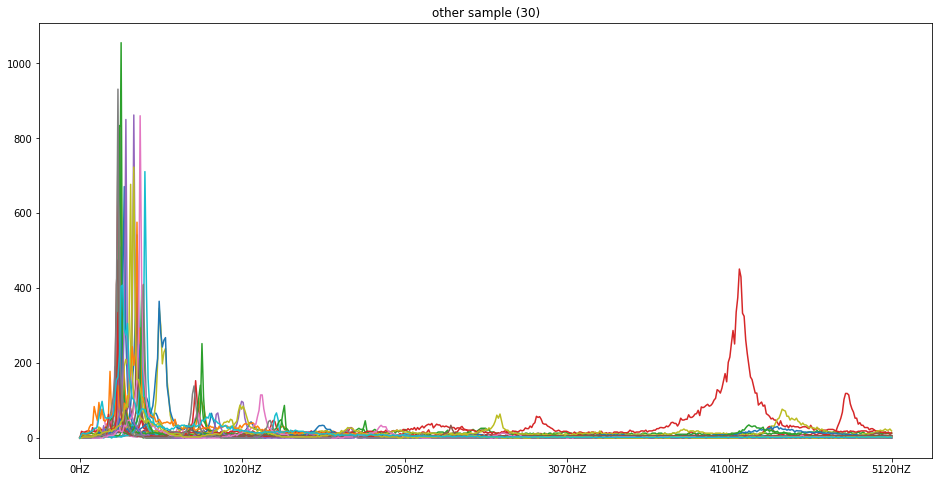

In [ ]:
tt = train[train[target] == 'other'].sample(30)
tt = tt.drop(target, axis=True).T
x_tick_positions = np.linspace(0, xSize, 6)
y_tick_positions = np.linspace(0, len(tt)-1, 6)

plt.figure(figsize=(16,8))
plt.title('other sample (30)')
plt.plot(tt)
plt.xticks(y_tick_positions)
plt.show()

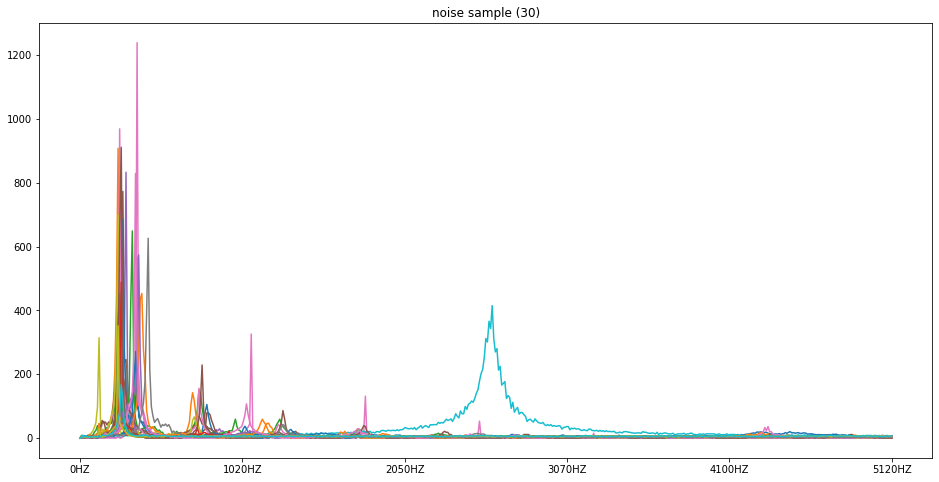

In [ ]:
tt = train[train[target] == 'noise'].sample(30)
tt = tt.drop(target, axis=True).T
x_tick_positions = np.linspace(0, xSize, 6)
y_tick_positions = np.linspace(0, len(tt)-1, 6)

plt.figure(figsize=(16,8))
plt.title('noise sample (30)')
plt.plot(tt)
plt.xticks(y_tick_positions)
plt.show()

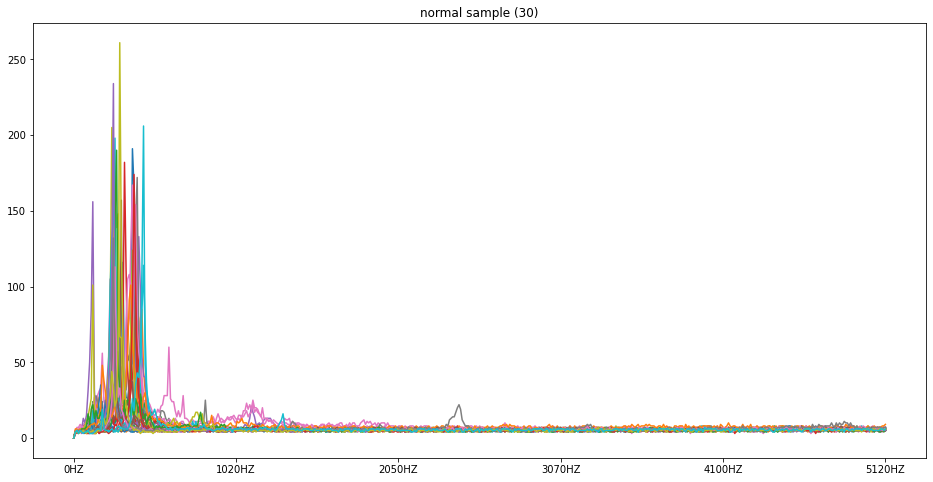

In [ ]:
tt = train[train[target] == 'normal'].sample(30)
tt = tt.drop(target, axis=True).T
x_tick_positions = np.linspace(0, xSize, 6)
y_tick_positions = np.linspace(0, len(tt)-1, 6)

plt.figure(figsize=(16,8))
plt.title('normal sample (30)')
plt.plot(tt)
plt.xticks(y_tick_positions)
plt.show()

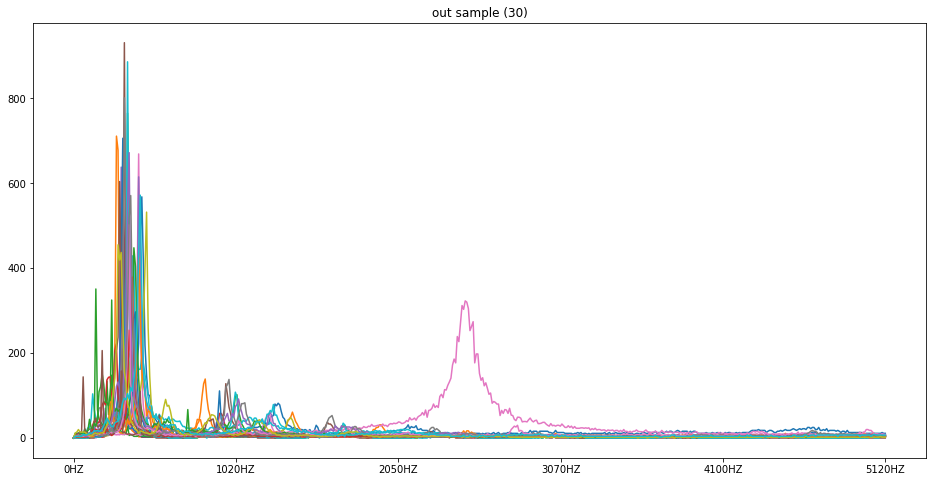

In [ ]:
tt = train[train[target] == 'out'].sample(30)
tt = tt.drop(target, axis=True).T
x_tick_positions = np.linspace(0, xSize, 6)
y_tick_positions = np.linspace(0, len(tt)-1, 6)

plt.figure(figsize=(16,8))
plt.title('out sample (30)')
plt.plot(tt)
plt.xticks(y_tick_positions)
plt.show()

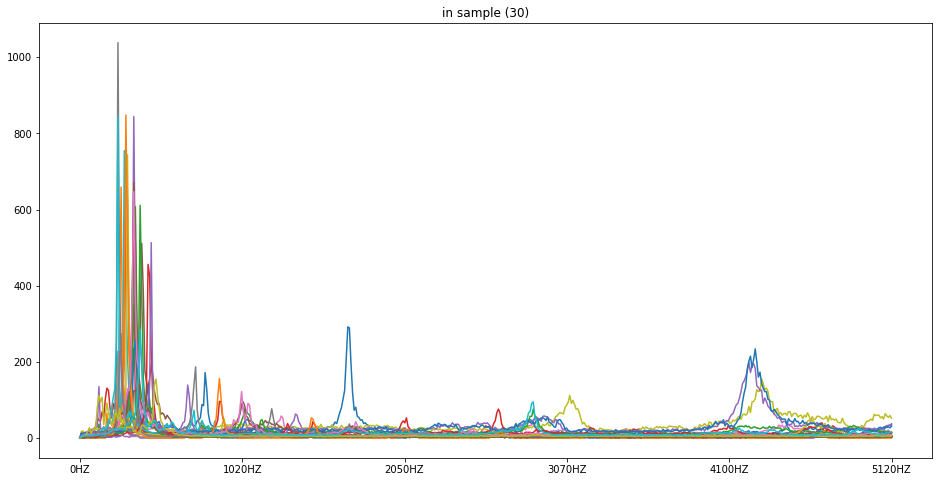

In [ ]:
tt = train[train[target] == 'in'].sample(30)
tt = tt.drop(target, axis=True).T
x_tick_positions = np.linspace(0, xSize, 6)
y_tick_positions = np.linspace(0, len(tt)-1, 6)

plt.figure(figsize=(16,8))
plt.title('in sample (30)')
plt.plot(tt)
plt.xticks(y_tick_positions)
plt.show()

In [ ]:
# duplicate 검색
df = val
duplicate_index = df.index.duplicated(keep='first')
if True in duplicate_index:
    print("There are duplicate values in the index.")
else:
    print("No duplicate values found in the index.")

No duplicate values found in the index.


In [ ]:
# # Colume 병합
# # df['10-100HZ'] = df.iloc[:,2:12].sum(axis=1)
# for i in range(51) :
#   saveString = str(100*(i+1)-90) + '-' + str(100*(i+1)) + 'HZ'
#   train[saveString] = train.iloc[:,((i*10)+2):((i*10)+12)].sum(axis=1)
#   val[saveString] = val.iloc[:,((i*10)+2):((i*10)+12)].sum(axis=1)
  
# #재료 데이터 제거
# train.drop(train.columns[train.columns.get_loc('0HZ'):train.columns.get_loc('5120HZ')+1], axis=1, inplace=True)
# val.drop(val.columns[val.columns.get_loc('0HZ'):val.columns.get_loc('5120HZ')+1], axis=1, inplace=True)

In [ ]:
#df 모든 컬럼을 float으로 변환
hzCols2 = [col for col in train.columns if 'HZ' in col]
for col in hzCols2:
  train[col] = train[col].astype(float)
  val[col] = val[col].astype(float)

#target 컬럼을 category으로 변환
train[target] =  train[target].astype('category')
val[target] =  val[target].astype('category')

#train test셋 생성
train, test = train_test_split(train, test_size=0.2, stratify=train[target], random_state=42)
X_train, y_train = train.drop(columns=[target]), train[target]
X_test, y_test = test.drop(columns=[target]), test[target]
X_val, y_val = val.drop(columns=[target]), val[target]

In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
def minMaxScale(df) :
  scaler_ = MinMaxScaler()
  scaler_.fit_transform(df)
  df_scaled = scaler_.transform(df)

  df_scaled = pd.DataFrame(df_scaled, columns=hzCols2)
  return df_scaled

X_train_scaled = minMaxScale(X_train)
X_test_scaled = minMaxScale(X_test)
X_val_scaled = minMaxScale(X_val)

In [ ]:
# LabelEncoder, minMaxScale, XGBClassifier

# feature/target 분리
X_train, y_train = train.drop(columns=[target]), train[target]
X_val, y_val = val.drop(columns=[target]), val[target]

# encoder = OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train)
# X_test_encoded = encoder.transform(X_test)
# X_val_encoded = encoder.transform(X_val)

#minMaxScale
X_train_scaled = minMaxScale(X_train)
X_test_scaled = minMaxScale(X_test)
X_val_scaled = minMaxScale(X_val)


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

model = XGBClassifier(
    objective="multi:softprob",
    eval_metric="auc",
    n_estimators=99999,
    random_state=42,
)

watchlist = [(X_train_encoded, y_train), (X_test_encoded, y_test)]

model.fit(
    X_train_encoded,
    y_train,
    eval_set=watchlist,
    early_stopping_rounds=50, # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

y_val_pred = model.predict(X_val)
from sklearn.metrics import classification_report

print(classification_report(y_val, y_val_pred))
#               precision    recall  f1-score   support
# objective="multi:softprob",
# eval_metric="auc",
# n_estimators=99999,
# random_state=42,
#            0       0.88      0.94      0.91      1659
#            1       0.91      0.85      0.88       629
#            2       0.95      0.98      0.97      2462
#            3       0.91      0.86      0.88       878
#            4       0.95      0.91      0.93      2192

#     accuracy                           0.93      7820
#    macro avg       0.92      0.91      0.91      7820
# weighted avg       0.93      0.93      0.93      7820
# [1113]	validation_0-auc:1.00000	validation_1-auc:0.99381

In [ ]:
df

,precision,recall,f1-score,support
0,0.879233,0.939120,0.908190,1659.000000
1,0.910169,0.853736,0.881050,629.000000
2,0.951594,0.982128,0.966620,2462.000000
3,0.905276,0.859909,0.882009,878.000000
4,0.952952,0.905566,0.928655,2192.000000
accuracy,0.927494,0.927494,0.927494,0.927494
macro avg,0.919845,0.908092,0.913305,7820.000000
weighted avg,0.928091,0.927494,0.927200,7820.000000


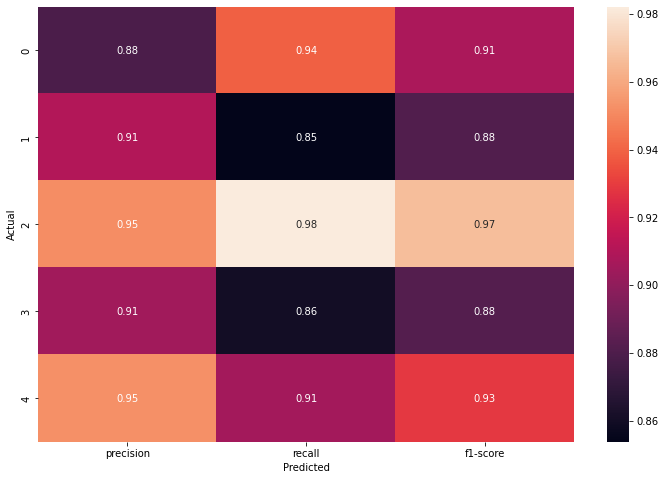

In [ ]:
df = pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).T
df = df.drop('support', axis=1)[:5]
plt.figure(figsize=(12,8))
sns.heatmap(df, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:

train2 = train.drop(train.loc[:, '1010HZ':].columns, axis=1).copy()

train, test = train_test_split(train2, test_size=0.2, stratify=train2[target], random_state=42)
X_train, y_train = train.drop(columns=[target]), train[target]
X_test, y_test = test.drop(columns=[target]), test[target]
X_val, y_val = val.drop(columns=[target]), val[target]

In [ ]:
!pip3 install hyperopt
!pip3 install eli5
!pip install category_encoders
!pip3 install xgboost==1.7.2
!pip3 install bayesian-optimization

In [ ]:
# pandas
import pandas as pd

# numpy
import numpy as np
from numpy import linalg

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.font_manager as fm
from matplotlib.ticker import LinearLocator

# scipy
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.misc import derivative
from scipy.stats.distributions import uniform

# statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot

# scikit-learn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import f_regression, SelectKBest, f_classif, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,RidgeCV, LassoCV, ElasticNetCV, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, plot_confusion_matrix, confusion_matrix, \
  classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# others
import graphviz
from xgboost import XGBClassifier, XGBRegressor
import re
import math
import seaborn as sns
from category_encoders import OrdinalEncoder
from scipy.stats.stats import ModeResult
from PIL import Image
from PIL import ImageOps
# from pdpbox.pdp import pdp_isolate, pdp_plot

In [ ]:
# OrdinalEncoder, LabelEncoder, XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

#필요 컬럼 : 
      # index : sid 
      # X : , (X)HZ
      # y : leaktype

# Make DataFrame
trainUrl = '/content/drive/MyDrive/AIProject/train/'
valUrl = '/content/drive/MyDrive/AIProject/val/'

dft1 = pd.read_csv( trainUrl + 'in_training.csv' )
dft2 = pd.read_csv( trainUrl + 'noise_training.csv' )
dft3 = pd.read_csv( trainUrl + 'other_training.csv' )
dft4 = pd.read_csv( trainUrl + 'out_training.csv' )
dft5 = pd.read_csv( trainUrl + 'normal_training.csv' )

dfv1 = pd.read_csv( valUrl + 'in_validation.csv' )
dfv2 = pd.read_csv( valUrl + 'noise_validation.csv' )
dfv3 = pd.read_csv( valUrl + 'other_validation.csv' )
dfv4 = pd.read_csv( valUrl + 'out_validation.csv' )
dfv5 = pd.read_csv( valUrl + 'normal_validation.csv' )

df_t = dft1.copy()
df_t = df_t.append(dft2)
df_t = df_t.append(dft3)
df_t = df_t.append(dft4)
df_t = df_t.append(dft5)
df_t = df_t.reset_index()

df_v = dfv1.copy()
df_v = df_v.append(dfv2)
df_v = df_v.append(dfv3)
df_v = df_v.append(dfv4)
df_v = df_v.append(dfv5)
df_v = df_v.reset_index()

hzCols1 = [col for col in df_v.columns if 'HZ' in col]
cols = ['leaktype']
cols += hzCols1

train = df_t[cols].copy()
val = df_v[cols].copy()

# train.dropna(inplace = True)
# train.drop_duplicates(inplace = True)

# val.dropna(inplace = True)
# val.drop_duplicates(inplace = True)

train = train.drop(train.loc[:, '1010HZ':].columns, axis=1).copy()
val = val.drop(val.loc[:, '1010HZ':].columns, axis=1).copy()

target = 'leaktype'

train, test = train_test_split(train, test_size=0.2, stratify=train[target], random_state=42)
X_train, y_train = train.drop(columns=[target]), train[target]
X_test, y_test = test.drop(columns=[target]), test[target]
X_val, y_val = val.drop(columns=[target]), val[target]

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)
X_val_encoded = encoder.transform(X_val)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

model = XGBClassifier(
    objective="multi:softprob",
    eval_metric="auc",
    n_estimators=99999,
    random_state=42,
)

watchlist = [(X_train, y_train), (X_test, y_test)]

model.fit(
    X_train,
    y_train,
    eval_set=watchlist,
    early_stopping_rounds=50, # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

y_val_pred = model.predict(X_val)
from sklearn.metrics import classification_report

print(classification_report(y_val, y_val_pred))
#               precision    recall  f1-score   support
# objective="multi:softprob",
# eval_metric="auc",
# n_estimators=99999,
# random_state=42,
#               precision    recall  f1-score   support

#            0       0.87      0.93      0.90      1659
#            1       0.90      0.88      0.89       629
#            2       0.95      0.98      0.96      2462
#            3       0.90      0.87      0.89       878
#            4       0.95      0.89      0.92      2192

#     accuracy                           0.93      7820
#    macro avg       0.92      0.91      0.91      7820
# weighted avg       0.93      0.93      0.93      7820
# [1149]	validation_0-auc:1.00000	validation_1-auc:0.99289

In [ ]:
from xgboost import plot_importance

plot_importance(model)
plt.show()

In [ ]:
# OrdinalEncoder, LabelEncoder, XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

hzCols1 = [col for col in df_v.columns if 'HZ' in col]
maxCols1 = [col for col in df_v.columns if 'MAX' in col]
cols = ['leaktype']
cols += hzCols1

train = df_t[cols].copy()
val = df_v[cols].copy()

train = train.drop(train.loc[:, '1010HZ':].columns, axis=1).copy()
val = val.drop(val.loc[:, '1010HZ':].columns, axis=1).copy()

#df 모든 컬럼을 float으로 변환
hzCols2 = [col for col in train.columns if 'HZ' in col]
for col in hzCols2:
  train[col] = train[col].astype(float)
  val[col] = val[col].astype(float)

#target 컬럼을 category으로 변환
train[target] =  train[target].astype('category')
val[target] =  val[target].astype('category')

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
def minMaxScale(df) :
  scaler_ = MinMaxScaler()
  scaler_.fit_transform(df)
  df_scaled = scaler_.transform(df)

  df_scaled = pd.DataFrame(df_scaled, columns=hzCols2)
  return df_scaled

train, test = train_test_split(train, test_size=0.2, stratify=train[target], random_state=42)

X_train, y_train = train.drop(columns=[target]), train[target]
X_test, y_test = test.drop(columns=[target]), test[target]
X_val, y_val = val.drop(columns=[target]), val[target]

X_train = minMaxScale(X_train)
X_test = minMaxScale(X_test)
X_val = minMaxScale(X_val)

# encoder = OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train)
# X_test_encoded = encoder.transform(X_test)
# X_val_encoded = encoder.transform(X_val)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

model = XGBClassifier(
    objective="multi:softprob",
    eval_metric="auc",
    n_estimators=99999,
    learning_rate=0.01,
    random_state=42,
)

watchlist = [(X_train, y_train), (X_test, y_test)]

model.fit(
    X_train,
    y_train,
    eval_set=watchlist,
    early_stopping_rounds=200, # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

y_val_pred = model.predict(X_val)
from sklearn.metrics import classification_report

print(classification_report(y_val, y_val_pred))
#               precision    recall  f1-score   support
# objective="multi:softprob",
# eval_metric="auc",
# n_estimators=99999,
# random_state=42,
#            0       0.88      0.94      0.91      1659
#            1       0.91      0.85      0.88       629
#            2       0.95      0.98      0.97      2462
#            3       0.91      0.86      0.88       878
#            4       0.95      0.91      0.93      2192

#     accuracy                           0.93      7820
#    macro avg       0.92      0.91      0.91      7820
# weighted avg       0.93      0.93      0.93      7820

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plot_confusion_matrix(model, X_val, y_val, 
                      cmap=plt.cm.Blues,
                      ax=ax)
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from scipy.stats.distributions import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import f1_score # f1 스코어
from sklearn.metrics import fbeta_score # f베타 스코어


pipe = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(
        objective="multi:softprob",
        eval_metric="auc",
        n_estimators=99999,
        random_state=42,
        n_jobs=-1
    )
)

params = {
    "xgbclassifier__max_depth": [6, 8, 10],
    "xgbclassifier__colsample_bytree": uniform(
         loc=0.5, scale=0.5
    ),  # 0.5 ~ 1 사이의 uniform 분포로 범위를 지정해 줍니다.
    # "xgbclassifier__learning_rate" : [0.05, 0.1, 0.3]
}

watchlist = [(X_train_encoded, y_train), (X_test_encoded, y_test)]

randomized_search = RandomizedSearchCV(
    pipe,
    param_distributions=params,
    scoring="f1",
    n_iter=10,
    cv=2,
    verbose=3,
    random_state=42,
)

randomized_search.fit(
    X_train, y_train,
    )

print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 f1: ", randomized_search.best_score_)
# sampleCount = 10000
# X_train_100 = X_train.sample(sampleCount, random_state=2)
# y_train_100 = y_train.sample(sampleCount, random_state=2)
# X_val_100 = X_val.sample(sampleCount, random_state=2)
# y_val_100 = y_val.sample(sampleCount, random_state=2)
# cv.fit(X_train_100, y_train_100)
# print("최적 하이퍼파라미터: ", cv.best_params_)

# cv.fit(X_train, y_train, early_stopping_rounds=50)
# print("최적 하이퍼파라미터: ", cv.best_params_)
# print("최적 f1: ", cv.best_score_)
# y_proba = cv.predict_proba(X_val)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def evaluation(model, X_val_encoded, y_val):

    y_pred_proba = model.predict_proba(X_val_encoded, iteration_range=(0, model.best_iteration))[:, 1]
    print("AUC Score:", roc_auc_score(y_val, y_pred_proba), '\n')

    y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    print(classification_report(y_val, y_pred), '\n')  

    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    plt.show()
evaluation(model, X_val_encoded, y_val)

In [ ]:
# # 박스플롯
# for i in range(10) : 
#   st = str((i+1)*100) + 'HZ'
#   sns.boxplot(x='leaktype', y=st, data=df)
#   plt.show()

In [ ]:
# dd = df[['leaktype','10HZ']].copy()
# dd = dd.reset_index()
# sns.pairplot(dd, hue="leaktype")
    
# plt.show()

In [ ]:
# #디스트 플롯
# def printDist(x1, x2 , d = 1) :
#   for i in range(x1, x2 , d) :
#       st = str((i+1)*100) + 'HZ'
#       sns.distplot(df[df['leaktype'] == 'in'][st], color='red',hist=False)
#       sns.distplot(df[df['leaktype'] == 'out'][st], color='red',hist=False)
#       sns.distplot(df[df['leaktype'] == 'noise'][st], color='green',hist=False)
#       sns.distplot(df[df['leaktype'] == 'other'][st], color='green',hist=False)
#       sns.distplot(df[df['leaktype'] == 'normal'][st], color='blue',hist=False)
#       plt.xlim([0,20])
#       plt.show()

In [ ]:
# dfsample1 = test.groupby('leaktype').sample(1)
# st = test.columns[3]
# sns.distplot(dfsample1[dfsample1['leaktype'] == 'in'][st])
# sns.distplot(dfsample1[dfsample1['leaktype'] == 'out'][st])
# sns.distplot(dfsample1[dfsample1['leaktype'] == 'noise'][st])
# sns.distplot(dfsample1[dfsample1['leaktype'] == 'other'][st])
# sns.distplot(dfsample1[dfsample1['leaktype'] == 'normal'][st])

In [ ]:
# # leaktype 별 샘플

# sample = test.groupby('leaktype').sample(1, random_state=2).drop('leaktype',axis=1)
# fig, ax = plt.subplots(1,1, figsize=(12, 4))
# ax.plot(sample.T)
# x_tick_positions = np.linspace(0, 52, 6)
# y_tick_positions = np.linspace(0, 1000, 6)
# ax.set_xticks(x_tick_positions)
# ax.set_yticks(y_tick_positions)
# ax.set_title('title')

# plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


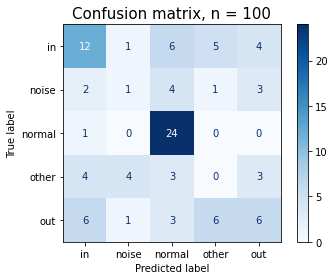

In [ ]:

# from sklearn.metrics import plot_confusion_matrix
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# plot_confusion_matrix(cv, X_val_sample100, y_val_sample100, 
#                       cmap=plt.cm.Blues,
#                       ax=ax)
# plt.title(f'Confusion matrix, n = {len(y_val_sample100)}', fontsize=15)
# plt.show()

In [ ]:
# 하이퍼 파라메터 수정
# minMaxScale    : 미적용
# OrdinalEncoder : 적용
# Hz             : 제한
# LabelEncoder,  
# XGBClassifier
# early_stopping_rounds : 200

#데이터 호출
train = df_t[cols].copy()
val = df_v[cols].copy()

#HZ 제한
train = train.drop(train.loc[:, '1010HZ':].columns, axis=1).copy()
val = val.drop(val.loc[:, '1010HZ':].columns, axis=1).copy()


# feature/target 분리
train, test = train_test_split(train, test_size=0.2, stratify=train[target], random_state=42)
X_train, y_train = train.drop(columns=[target]), train[target]
X_test, y_test = test.drop(columns=[target]), test[target]
X_val, y_val = val.drop(columns=[target]), val[target]

#OrdinalEncoder
encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_val = encoder.transform(X_val)

#LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

#make_pipeline
pipe = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(
        objective="multi:softprob",
        eval_metric="auc",
        n_estimators=99999,
        random_state=42,
        n_jobs=-1
    )
)

#params
params = {
    "xgbclassifier__max_depth": [6, 8, 10],
    "xgbclassifier__colsample_bytree": uniform(
         loc=0.5, scale=0.5
    ),  # 0.5 ~ 1 사이의 uniform 분포로 범위를 지정해 줍니다.
    # "xgbclassifier__learning_rate" : [0.05, 0.1, 0.3]
}

watchlist = [(X_train_encoded, y_train), (X_test_encoded, y_test)]

model = RandomizedSearchCV(
    pipe,
    param_distributions=params,
    scoring="roc_auc",
    n_iter=10,
    cv=2,
    verbose=3,
    random_state=42,
)

model.fit(
    X_train, y_train,
    early_stopping_rounds=100,
    )

y_val_pred = model.predict(X_val)

print(classification_report(y_val, y_val_pred))

draw_confusion_matrix(y_val, y_val_pred, le.classes_)

plot_importance(model,max_num_features=20,importance_type = "weight")
plt.show()

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간